In [1]:
%load_ext autoreload
%autoreload 2

In [16]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import xgboost as xgb
import yaml

from functools import partial
from pathlib import Path
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

# local imports
from hydra import compose, initialize
from src.data_processing.model_analyzers.xgb_analyzers.XGBRegAnalyzer import XGBRegAnalyzer, XGBRegAnalyzerFactory
from src.data_processing.model_analyzers.xgb_analyzers.XGBRegrResults import XGBRegrResults

# Dopamine Only

In [17]:
da_only_path = '/projects/p31961/ENIGMA/results/experiments/xgb_regression_da_only_hyperopt_tune'

results = XGBRegrResults(da_only_path)
analyzer = XGBRegAnalyzer(results)


results = XGBRegrResults(da_only_path)
analyzer = XGBRegAnalyzer(results)
# analyzer.fit_best_xgb_model()
# analyzer.plot_model_results()

In [18]:

analyzer.create_debug_pipeline(cols_to_drop=['day', 'mouse_id'])

AttributeError: 'XGBRegAnalyzer' object has no attribute 'create_debug_pipeline'

In [ ]:
analyzer.plot_shap_results()

In [ ]:
cluters = analyzer.plot_shap_cluster_bar()

# First tried selecting top 10 most important features:

In [ ]:
top_10 = analyzer.feature_importance_df.iloc[-10:].feature.tolist()
cols_to_drop = [feature for feature in analyzer.feature_names if feature not in
    top_10]
cols_to_drop

In [ ]:

top_10_results = XGBRegrResults(da_only_path)
top_10_analyzer = XGBRegAnalyzer(top_10_results)
top_10_analyzer.create_pipeline(cls_to_drop=cols_to_drop + ['day', 'mouse_id'])
top_10_analyzer.fit_best_xgb_model()

In [ ]:
top_10_analyzer.plot_model_results()

In [ ]:
names = analyzer.shap_explanation.feature_names
values = analyzer.shap_explanation.values
value_df = pd.DataFrame(values, columns=names)
mean_shap = value_df.mean()
bottom_quartile = mean_shap.describe().loc['25%']
upper_quartile = mean_shap.describe().loc['75%']
# mean_shap.query(f'({bottom_quartile} < @mean_shap) & (@mean_shap < {upper_quartile})')
mean_shap_df = (pd.DataFrame(mean_shap.sort_values())
                .transpose()
                .melt(var_name='feature', value_name='shap_value')
                .query(f"shap_value < @bottom_quartile or shap_value > @upper_quartile")
                .reset_index(drop=True)
)
important_features = mean_shap_df['feature'].tolist()
cols_to_drop = [feature for feature in names if feature not in important_features]




In [ ]:
mean_shap.index.tolist()

In [ ]:
sorted_shaps = mean_shap.sort_values()
sorted_shaps
bottom_3 = sorted_shaps[0:3]
top_3 = sorted_shaps[-3:]
all_6 = pd.concat([bottom_3, top_3])
top_6 = all_6.index.tolist()
top_6_results = XGBRegrResults(da_only_path)
top_6_analyzer = XGBRegAnalyzer(top_6_results)
cols_to_drop = [feature for feature in sorted_shaps.index.tolist() if feature not in top_6]
cols_to_drop
top_6_analyzer.create_pipeline(cls_to_drop=cols_to_drop+['day', 'mouse_id'])

In [ ]:

top_6_analyzer._xgb_model = xgb.XGBRegressor()
top_6_analyzer.fit_best_xgb_model()



In [ ]:
top_6_analyzer.plot_model_results()

# Dopamine with Day

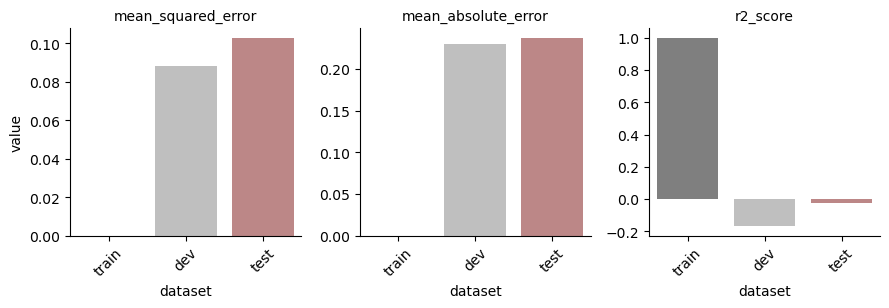

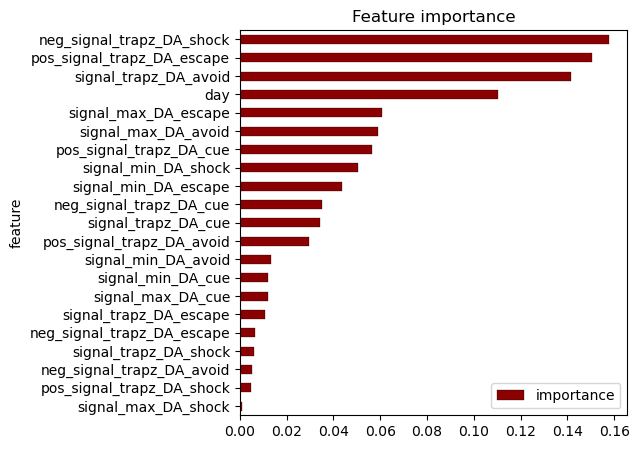

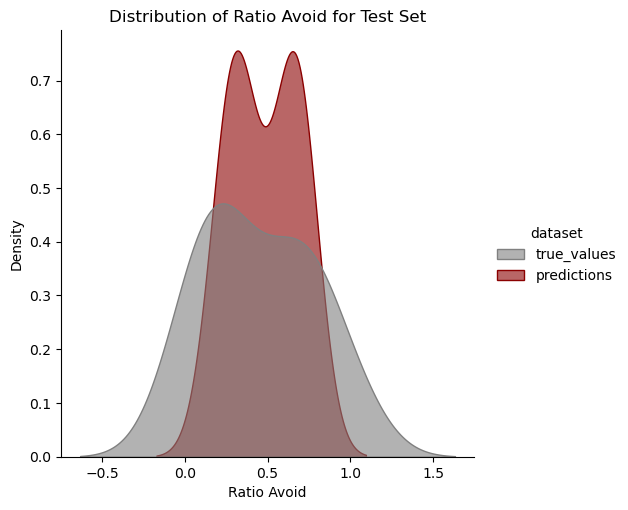

In [115]:

da_with_day_path = '/projects/p31961/ENIGMA/results/experiments/xgb_regression_da_only_hyperopt_tuneS_with_day'

results = XGBRegrResults(da_with_day_path)
analyzer = XGBRegAnalyzer(results)
analyzer.create_pipeline(cls_to_drop=['mouse_id'])
analyzer.fit_best_xgb_model()
analyzer.plot_model_results()


In [ ]:
analyzer.plot_shap_results()

# DA + D1 only


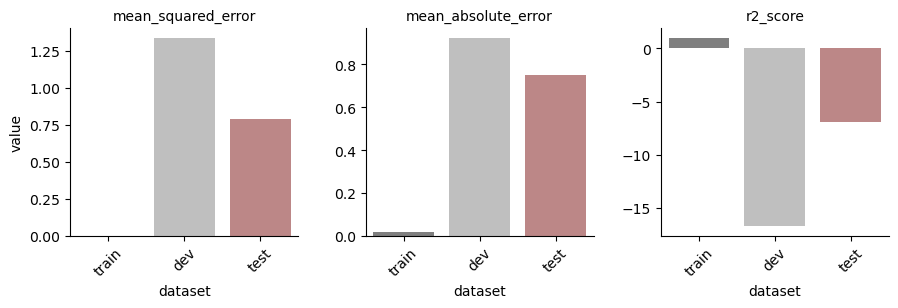

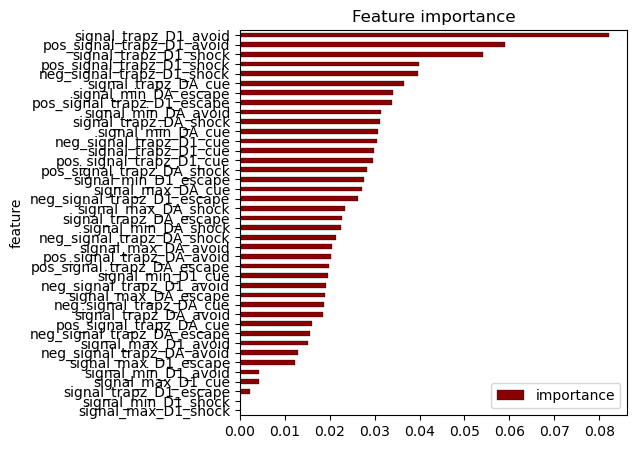

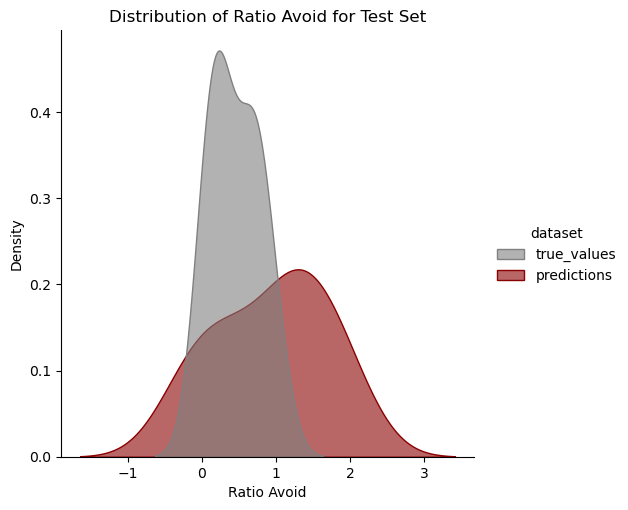

In [116]:
da_d1_path = '/projects/p31961/ENIGMA/results/experiments/xgb_regression_da_and_d1_hyperopt_tune'
results = XGBRegrResults(da_d1_path)
analyzer = XGBRegAnalyzer(results)
analyzer.fit_best_xgb_model()
analyzer.plot_model_results()

In [ ]:
analyzer.plot_shap_results()

# DA + D1 with Day

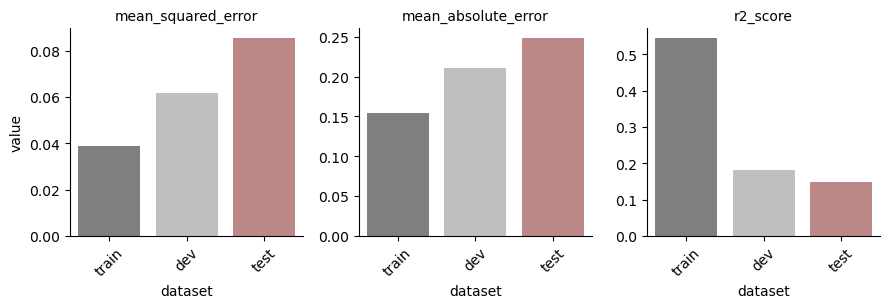

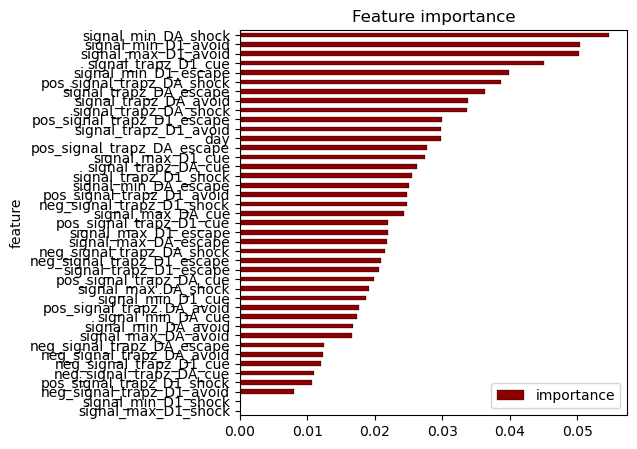

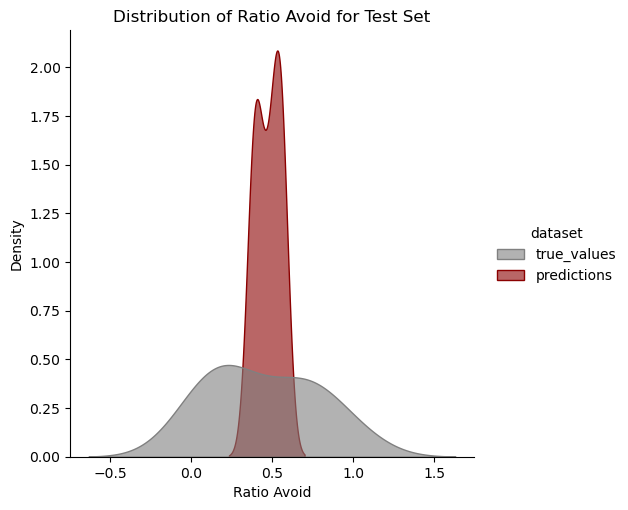

In [117]:
da_d1_with_day_path = '/projects/p31961/ENIGMA/results/experiments/xgb_regression_da_and_d1_hyperopt_tune_with_day'
results = XGBRegrResults(da_d1_with_day_path)
analyzer = XGBRegAnalyzer(results)
analyzer.create_pipeline(cls_to_drop=['mouse_id'])
analyzer.fit_best_xgb_model()
analyzer.plot_model_results()

In [ ]:
analyzer.plot_shap_results()

# DA + D2 Only

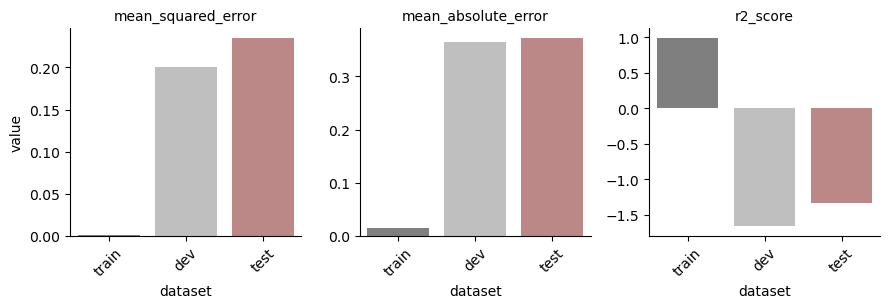

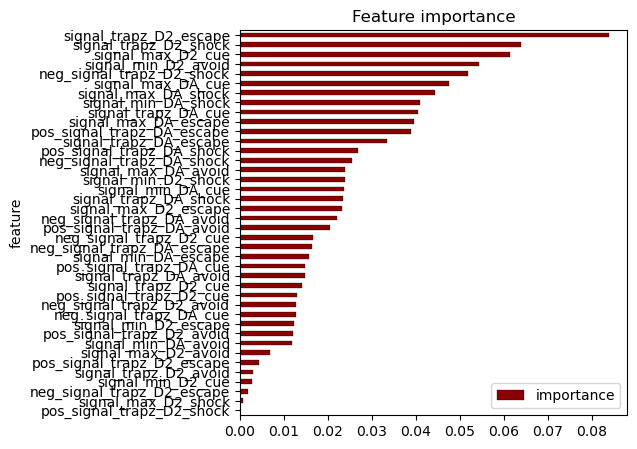

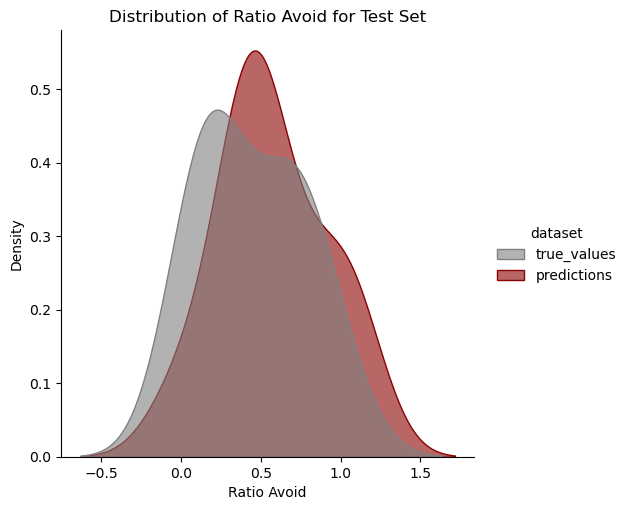

In [120]:
da_d2_path = '/projects/p31961/ENIGMA/results/experiments/xgb_regression_da_and_d2_hyperopt_tune'
results = XGBRegrResults(da_d2_path)
analyzer = XGBRegAnalyzer(results)
analyzer.fit_best_xgb_model()
analyzer.plot_model_results()

In [ ]:
analyzer.plot_shap_results()

# DA + D2 with Day

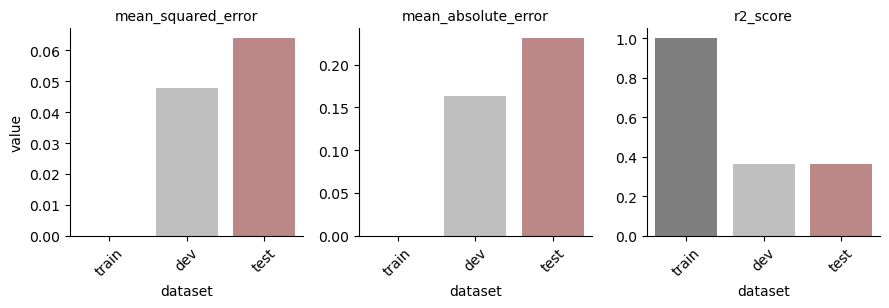

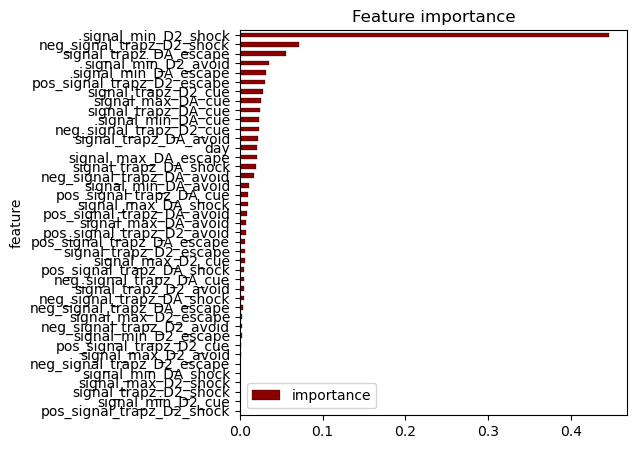

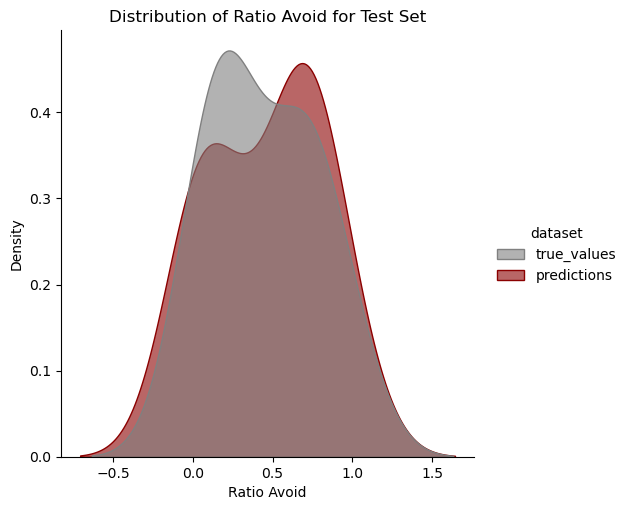

In [121]:
da_d2_with_day_path = '/projects/p31961/ENIGMA/results/experiments/xgb_regression_da_and_d2_hyperopt_tune_with_day'
results = XGBRegrResults(da_d2_with_day_path)
analyzer = XGBRegAnalyzer(results)
analyzer.create_pipeline(cls_to_drop=['mouse_id'])
analyzer.fit_best_xgb_model()
analyzer.plot_model_results()

In [ ]:
analyzer.plot_shap_results()